In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import deque, namedtuple

In [ ]:
m = 5
n = 5
nodes = []
for row in range(m):
    for col in range(n):
        nodes.append((row, col))

print(nodes)



[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


In [ ]:
def nbrs4(square):
  x = square[0]
  y = square[1]
  nbrs_theo = [(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)]
  nbrs = [i for i in nbrs_theo if i[0] >= 0 and i[1] >= 0 and i[0] < m and i[1] < n ]
  return nbrs


In [ ]:
nbrs4((0,0))

[(1, 0), (0, 1)]

In [ ]:
tree = [(0,0)]
frontier = [] #This is stack

def edge(A, B):
  return(sorted([A, B]))

j = 0
while nodes:

  for i in range(len(nbrs4(tree[j]))):
   frontier.append(nbrs4(tree[j])[i])

  random.shuffle(frontier)
  print("Frontier")
  print(frontier)

  frontier_new =  [sub for sub in frontier if sub not in tree]

  print("Frontier new")
  print(frontier_new)



  if not frontier_new or tree[j] == (m-1,n-1):
    #Check which node in the tree has valid nbrs and revert back till there
    l = 0
    for k in reversed(tree):
      l += 1
      list_difference = []

      for i in range(len(nbrs4(k))):

       if nbrs4(k)[i] not in tree:
        list_difference.append(nbrs4(k)[i]) #Compare the dissimilar elements in nbrs
                                         #and tree and see if a node has possible
       if len(list_difference) != 0:
         break
                                      #elements that can be added to tree
      else:
         continue                           #note the node index (to which we need to go)
      break

    print("Revert back to",l+1, "th node from the end")
    frontier = []
    for i in range(len(nbrs4(tree[j-l+1]))):
     frontier.append(nbrs4(tree[j-l+1])[i])
    random.shuffle(frontier)
    print("Frontier")
    print(frontier)

    frontier_new =  [sub for sub in frontier if sub not in tree]

    print("Frontier new")
    print(frontier_new)


  new_node = frontier_new.pop() #Accessing last element of frontier_new
                                # Which is anyways a random element in frontier
  for i in tree:
     if(i == new_node):
      dump = new_node
  frontier = []
  frontier_new=[]

  tree.append(new_node)

  print("Tree:")
  print(tree)

  nodes =  [sub for sub in nodes if sub not in tree]

  print("Nodes:")
  print(nodes)

  print("\n")
  j +=1

#Every neighbouring tuples form an edge
maze_edges = []
for i in range(len(tree)-1):
  maze_edges.append(edge(tree[i],tree[i+1]))





In [ ]:
def nbrtest(A,B):
  yes = 0
  for i in nbrs4(A):
    if i == B:
      yes = 1
  if yes == 1:
    return 1
  else:
    return 0

In [ ]:
maze = []
for i in range(len(tree)-1):

  if nbrtest(tree[i],tree[i+1]): #while adjacent nodes in tree are nbrs
   maze.append(edge(tree[i],tree[i+1])) #Keep adding edges consecutively
  else:
    for j in range(i):               #If adjacent nodes are not nbrs
     if nbrtest(tree[i-j],tree[i+1]): #go back and check which node is nbrs to i+1
       maze.append(edge(tree[i-j],tree[i+1])) #add this edge to the maze, nxt loop
                                               #continues like before


maze_tuples = list(map(tuple, maze))
print(maze_tuples)


[((0, 0), (1, 0)), ((1, 0), (2, 0)), ((2, 0), (2, 1)), ((2, 1), (3, 1)), ((3, 1), (3, 2)), ((2, 2), (3, 2)), ((1, 2), (2, 2)), ((1, 1), (1, 2)), ((0, 1), (1, 1)), ((0, 1), (0, 2)), ((0, 2), (0, 3)), ((0, 3), (0, 4)), ((0, 4), (1, 4)), ((1, 3), (1, 4)), ((1, 3), (2, 3)), ((2, 3), (3, 3)), ((3, 3), (3, 4)), ((2, 4), (3, 4)), ((3, 4), (4, 4)), ((4, 3), (4, 4)), ((4, 2), (4, 3)), ((4, 1), (4, 2)), ((4, 0), (4, 1)), ((3, 0), (4, 0))]


In [ ]:
Maze = namedtuple('Maze', ['width', 'height', 'edges'])
details = [m, n, maze_tuples]
e1 = Maze._make(details)
print(e1)


Maze(width=5, height=5, edges=[((0, 0), (1, 0)), ((1, 0), (2, 0)), ((2, 0), (2, 1)), ((2, 1), (3, 1)), ((3, 1), (3, 2)), ((2, 2), (3, 2)), ((1, 2), (2, 2)), ((1, 1), (1, 2)), ((0, 1), (1, 1)), ((0, 1), (0, 2)), ((0, 2), (0, 3)), ((0, 3), (0, 4)), ((0, 4), (1, 4)), ((1, 3), (1, 4)), ((1, 3), (2, 3)), ((2, 3), (3, 3)), ((3, 3), (3, 4)), ((2, 4), (3, 4)), ((3, 4), (4, 4)), ((4, 3), (4, 4)), ((4, 2), (4, 3)), ((4, 1), (4, 2)), ((4, 0), (4, 1)), ((3, 0), (4, 0))])


PLOTTING THE MAZE

In [ ]:
def grid(width, height):
    """All squares in a grid of these dimensions."""
    return {(x, y) for x in range(width) for y in range(height)}

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_maze(maze, figsize=None, path=None):
    """Plot a maze by drawing lines between adjacent squares, except for pairs in maze.edges"""
    w, h  = maze.width, maze.height
    plt.figure(figsize=figsize or (w/5, h/5))

    plt.gca().invert_yaxis()
    plt.axis('off')

    plt.xticks([])
    plt.yticks([])

    edges = maze.edges
    for sq in grid(w, h):
        for nbr in nbrs4(sq):
            if tuple(edge(sq, nbr)) not in edges:
              plot_wall(sq, nbr)
    for i in range(n):
      left, right = [0,0], [i,i+1]
      plt.plot(left, right, 'k-', linewidth=2)
    for i in range(m):
      left, right = [i,i+1], [0,0]
      plt.plot(left, right, 'k-', linewidth=2)
    for i in range(m):
      left, right = [i,i+1], [n,n]
      plt.plot(left, right, 'k-', linewidth=2)
    for i in range(n):
      left, right = [n,n], [i,i+1]
      plt.plot(left, right, 'k-', linewidth=2)

    if path: # Plot the solution (or any path) as a red line through the maze
        X, Y = transpose((x + 0.5, y + 0.5) for (x, y) in path)
        plt.plot(X, Y, 'r-', linewidth=2)


def transpose(matrix): return list(zip(*matrix))

def plot_wall(s1, s2):
    """Plot a wall: a black line between squares s1 and s2."""
    (x1, y1), (x2, y2) = s1, s2
    if x1 == x2: # horizontal wall
        y = max(y1, y2)
        X, Y = [x1, x1+1], [y, y]
    else: # vertical wall
        x = max(x1, x2)
        X, Y = [x, x], [y1, y1+1]
    plt.plot(X, Y, 'k-', linewidth=2)

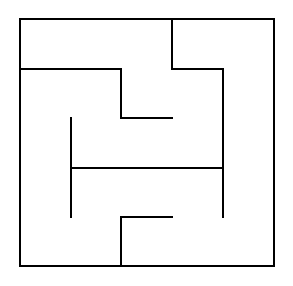

In [ ]:

plot_maze(e1, figsize=(5, 5))


In [ ]:
def breadth_first_search(maze):
    """Find a shortest sequence of states from start to the goal."""
    start = (0, 0)
    goal = (maze.width - 1, maze.height - 1)
    frontier = deque([start])
    print(frontier)  # A queue of states to consider
    paths = {start: [start]}   # start has a one-square path
    print(paths)
    while frontier:
        s = frontier.pop()
        if s == goal:
            return paths[s]
        for s2 in nbrs4(s):
            if s2 not in paths and edge(s, s2) in maze.edges:
                frontier.append(s2)
                paths[s2] = paths.get(s, []) + [s2]

In [ ]:
solution = breadth_first_search(e1)
print(solution)

deque([(0, 0)])
{(0, 0): [(0, 0)]}
None


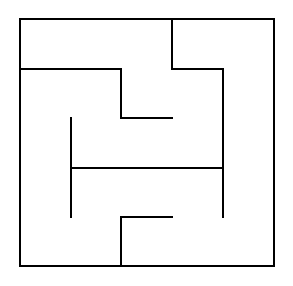

In [ ]:
plot_maze(e1, figsize=(5, 5), path=solution)

Solving maze


In [ ]:
def heurestic(square):
  dis = abs(square[0] - (m-1)) + abs(square[1] - (n-1))
  return dis

In [ ]:
graph_nodes = []
for row in range(m):
    for col in range(n):
        graph_nodes.append((row, col))

print(graph_nodes)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


In [ ]:
dicts = {}
keys = range(4)
values = ["Hi", "I", "am", "John"]
for i in keys:
        dicts[i] = values[i]
print(dicts)

{0: 'Hi', 1: 'I', 2: 'am', 3: 'John'}


In [ ]:
# for i in range(len(graph_nodes)):
#    values = []
#    for j in range(len(nbrs4(graph_nodes[i]))):
#      if nbrs4(graph_nodes[i][j]) in tree:
#        entries = [nbrs4(graph_nodes[i][j])]
#        values.append(entries)




In [ ]:
graph = {'A': {'B': 1}, 'B': {'A': 1, 'C': 1}, 'C': {'H': 1, 'B': 1},
         'D': {'E':1}, 'E': {'D':1,'J':1},
         'F': {'G':1,'K':1}, 'G': {'F':1,'L':1}, 'H': {'C':1,'I':1},
         'I': {'H':1,'N':1}, 'J': {'E':1,'O':1}, 'K': {'L':1,'F':1}, 'L': {'G':1,'M':1},
         'M': {'L':1,'N':1}, 'N': {'I':1,'M':1}, 'O': {'J':1,'T':1}, 'P': {'K':1,'U':1},
         'Q': {'R':1,'V':1}, 'R':{'Q':1,'S':1}, 'S':{'R':1,'N':1, 'X':1}, 'T':{'O':1,'Y':1}, 'U':{'P':1,'V':1},
         'V': {'U':1,'Q':1}, 'W':{'X':1}, 'X':{'S':1,'W':1}, 'Y':{'T':1, 'X':1} }

In [ ]:
heurestic = {'A': }

In [ ]:
solution =[(0,0),(1,0),(2,0),(2,1),(3,1),(3,2),(2,2),(1,2),(1,1),(0,1),(0,2),(0,3),(0,4),(1,4),(1,3),(2,3),(3,3),(3,4),(4,4)]

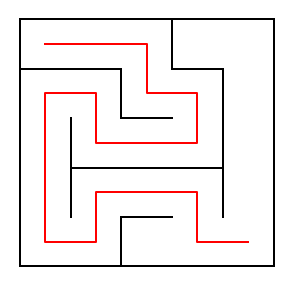

In [ ]:
plot_maze(e1, figsize=(5, 5), path=solution)

In [ ]:
open_list = ['A']
closed_list = []
print(open_list)

['A']


In [ ]:
for i in graph:
  a = open_list.pop()
  open_list.append(graph[i])
  closed_list.append(a)
